In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
from keras.models import Sequential

In [54]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers


In [55]:
attr_df = pd.read_csv('list_attr_celeba.csv')
attr_df.head(10)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
5,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
6,000007.jpg,1,-1,1,1,-1,-1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
7,000008.jpg,1,1,-1,1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
8,000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1
9,000010.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


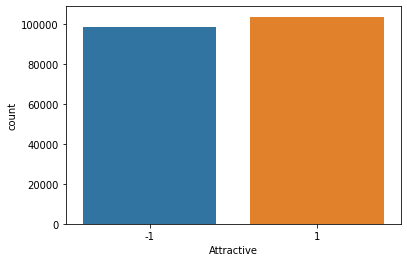

In [56]:
sns.countplot(x='Attractive',data=attr_df)

In [57]:
attr_df.shape

(202599, 41)

In [58]:
attr_df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [59]:
attr_df.isna().count()

image_id               202599
5_o_Clock_Shadow       202599
Arched_Eyebrows        202599
Attractive             202599
Bags_Under_Eyes        202599
Bald                   202599
Bangs                  202599
Big_Lips               202599
Big_Nose               202599
Black_Hair             202599
Blond_Hair             202599
Blurry                 202599
Brown_Hair             202599
Bushy_Eyebrows         202599
Chubby                 202599
Double_Chin            202599
Eyeglasses             202599
Goatee                 202599
Gray_Hair              202599
Heavy_Makeup           202599
High_Cheekbones        202599
Male                   202599
Mouth_Slightly_Open    202599
Mustache               202599
Narrow_Eyes            202599
No_Beard               202599
Oval_Face              202599
Pale_Skin              202599
Pointy_Nose            202599
Receding_Hairline      202599
Rosy_Cheeks            202599
Sideburns              202599
Smiling                202599
Straight_H

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [61]:
for i in attr_df.columns:
    if i != "image_id":
        attr_df[i] = labelencoder.fit_transform(attr_df[i])

In [62]:
attr_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


In [ ]:
from tqdm import tqdm
from keras.preprocessing import image
train_image = []
for i in tqdm(range(attr_df.shape[0])):
    img = image.load_img('/home/reorder/feature_extraction/archive/img_align_celeba/img_align_celeba/'+attr_df['image_id'][i],target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

 20%|██        | 40650/202599 [03:21<08:13, 327.87it/s]  

In [63]:
Labels = [i for i in attr_df.columns]

In [64]:
len(Labels)

41

In [65]:
Labels=Labels[1:]
len(Labels)

40

In [66]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [67]:
Validate_sample = int(.3 * 202599)
Train_sample = int(202599 - Validate_sample)
Test_sample = int((0.1)*Train_sample)
print("Train :",Train_sample)
print("Validate_sample and train_sample:",Validate_sample,Test_sample)

Train : 141820
Validate_sample and train_sample: 60779 14182


In [82]:
60779-14182

46597

In [83]:
141820+46597

188417

In [69]:
attr_df[:162080]

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162075,162076.jpg,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
162076,162077.jpg,0,0,0,0,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,0
162077,162078.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,1
162078,162079.jpg,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [73]:
attr_df1 = attr_df.drop(columns='image_id',axis=1)

In [79]:
train_generator = datagen.flow_from_dataframe(dataframe=attr_df[:141820],directory="/home/reorder/feature_extraction/archive/img_align_celeba/img_align_celeba/",x_col="image_id",y_col=Labels,batch_size=128,shuffle=True,class_mode='raw',target_size=(100,100))

Found 141820 validated image filenames.


In [84]:
valid_generator = datagen.flow_from_dataframe(dataframe=attr_df[141820:188417],directory="/home/reorder/feature_extraction/archive/img_align_celeba/img_align_celeba/",x_col="image_id",y_col=Labels,batch_size=128,seed=42,shuffle=True,class_mode='raw',target_size=(100,100))

Found 46597 validated image filenames.


In [85]:
test_generator = datagen.flow_from_dataframe(dataframe=attr_df[188417:],directory="/home/reorder/feature_extraction/archive/img_align_celeba/img_align_celeba/",x_col="image_id",y_col=Labels,batch_size=1,seed=42,shuffle=True,class_mode=None,target_size=(100,100))

Found 14182 validated image filenames.


In [86]:
len(Labels)

40

In [87]:
# Model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [88]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size


In [89]:
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST

(1107, 364, 14182)

In [90]:
model.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,validation_data=valid_generator,validation_steps=STEP_SIZE_VALID,epochs=10,verbose=1)

Epoch 1/10
1107/1107 [==============================] - 2584s 2s/step - loss: 0.3368 - accuracy: 0.8550 - val_loss: 0.2818 - val_accuracy: 0.8825
Epoch 2/10
1107/1107 [==============================] - 2344s 2s/step - loss: 0.2761 - accuracy: 0.8800 - val_loss: 0.2423 - val_accuracy: 0.8930
Epoch 3/10
1107/1107 [==============================] - 2342s 2s/step - loss: 0.2586 - accuracy: 0.8871 - val_loss: 0.2390 - val_accuracy: 0.8963
Epoch 4/10
1107/1107 [==============================] - 2342s 2s/step - loss: 0.2487 - accuracy: 0.8913 - val_loss: 0.2384 - val_accuracy: 0.8985
Epoch 5/10
1107/1107 [==============================] - 2343s 2s/step - loss: 0.2414 - accuracy: 0.8943 - val_loss: 0.2198 - val_accuracy: 0.9017
Epoch 6/10
1107/1107 [==============================] - 2346s 2s/step - loss: 0.2363 - accuracy: 0.8965 - val_loss: 0.2239 - val_accuracy: 0.9027
Epoch 7/10
1107/1107 [==============================] - 2351s 2s/step - loss: 0.2315 - accuracy: 0.8986 - val_loss: 0.2392 -

In [91]:
model.save("multilabel.h5")

In [92]:
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)


14182/14182 [==============================] - 133s 9ms/step


In [93]:
pred_bool = (pred >0.5)

In [94]:
pred_bool

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False,  True,  True, ..., False, False,  True]])

In [97]:
predictions = pred_bool.astype(int)
columns=Labels
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)